In [84]:
from gql import gql,Client
#the graphql package for python
from gql.transport.requests import RequestsHTTPTransport
#this is the main file

In [85]:
sample_transport=RequestsHTTPTransport(
    url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',
    verify=True,
    retries=5,
)
#standard configuration

In [86]:
client = Client(
transport = sample_transport
)
#estabilishing and finally getting the data is done by the client from gql
#the name of the pool is uniswap-v2

In [87]:

query_1 = gql('''
query trades{
  swaps(where:{pair: "0xa478c2975ab1ea89e8196811f51a7b7ade33eb11"}, orderBy: timestamp, orderDirection: desc, first:150, block: {number:11009390}) {
    id
    timestamp
    amount0In
    amount1In
    amount0Out
    amount1Out
    pair {
      token0 {
        id
        symbol
      }
      token1 {
        id
        symbol
      }
    }
    transaction {
      blockNumber
    }
  }
}''')
#the below is the historical data query
query_2 = gql('''
query swaps{
  swaps(orderBy: timestamp, orderDirection: desc, first:150, where:{pair: "0xa47ea5b74b6879c52250794376443eebd8a17bb3"}) {
    timestamp
    amount0In
    amount0Out
    amount1In
    amount1Out
    amountUSD
    pair {
        token0 {
        id
        symbol
        tradeVolumeUSD
        totalLiquidity
        totalSupply
      }
        token1 {
        id
        symbol
        tradeVolumeUSD
        totalLiquidity
        totalSupply
      }
      volumeUSD
      
    }
    transaction {
        id
        blockNumber
    
    }
  }
}''')
#there is a difference in what you query, either a pair of a particular transaction
#on the website for uniswap token pair, some of the token pairs use capital characters in the adress, which does not work on the engine. 
#0xa478c2975ab1ea89e8196811f51a7b7ade33eb11 = DAI/WETH Pair

In [88]:
response_1 = client.execute(query_2)
#print(response_1)

In [89]:
import numpy as np
import pandas as pd


In [90]:
df = pd.DataFrame(response_1)


In [91]:
#print(df)
print(df)

                                                swaps
0   {'amount0In': '0', 'amount0Out': '166.36234311...
1   {'amount0In': '19.8', 'amount0Out': '0', 'amou...
2   {'amount0In': '0', 'amount0Out': '49.85089216'...
3   {'amount0In': '49.5', 'amount0Out': '0', 'amou...
4   {'amount0In': '0', 'amount0Out': '11.78443205'...
5   {'amount0In': '0.53714307', 'amount0Out': '0',...
6   {'amount0In': '0', 'amount0Out': '1', 'amount1...
7   {'amount0In': '0', 'amount0Out': '2', 'amount1...
8   {'amount0In': '0', 'amount0Out': '1', 'amount1...
9   {'amount0In': '0', 'amount0Out': '0.5', 'amoun...
10  {'amount0In': '0', 'amount0Out': '0.5', 'amoun...
11  {'amount0In': '0', 'amount0Out': '0.00001722',...
12  {'amount0In': '4.9005', 'amount0Out': '0', 'am...
13  {'amount0In': '0', 'amount0Out': '5', 'amount1...
14  {'amount0In': '476.79834019', 'amount0Out': '0...
15  {'amount0In': '0', 'amount0Out': '200', 'amoun...
16  {'amount0In': '0', 'amount0Out': '1.07', 'amou...
17  {'amount0In': '0', 'amou

In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   swaps   33 non-null     object
dtypes: object(1)
memory usage: 392.0+ bytes
None


In [93]:
print(len(df))

33


In [94]:
print(df.shape)

(33, 1)


In [95]:
df.swaps = df.swaps.fillna({i: {} for i in df.index})

In [96]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   swaps   33 non-null     object
dtypes: object(1)
memory usage: 392.0+ bytes
None


In [97]:
#df.swaps = df.swaps.apply(literal_eval)

In [98]:
df = df.join(pd.json_normalize(df.swaps))

In [99]:
df.drop(columns=['swaps'], inplace=True)
#the above lines of code are used to split the swaps dataset into its constituent columns

In [100]:
print(df)

       amount0In     amount0Out             amount1In            amount1Out  \
0              0   166.36234311                  0.02                     0   
1           19.8              0                     0  0.197282391218907402   
2              0    49.85089216               0.19825                     0   
3           49.5              0                     0  0.061411834927614139   
4              0    11.78443205              0.059475                     0   
5     0.53714307              0                     0  0.000117192412105661   
6              0              1  0.000211451964927421                     0   
7              0              2  0.000336802814775143                     0   
8              0              1  0.000136316585155299                     0   
9              0            0.5  0.000061864391516565                     0   
10             0            0.5  0.000058167685651202                     0   
11             0     0.00001722  0.00000000194408627

In [101]:
#now the part of the analytics

In [102]:
import matplotlib as plt

In [103]:
import matplotlib.pyplot as plt
#either matplotlib or plotly can be used for this purpose.

In [104]:
print(df.head())

  amount0In    amount0Out amount1In            amount1Out  \
0         0  166.36234311      0.02                     0   
1      19.8             0         0  0.197282391218907402   
2         0   49.85089216   0.19825                     0   
3      49.5             0         0  0.061411834927614139   
4         0   11.78443205  0.059475                     0   

                             amountUSD   timestamp  \
0  12.69168727125614564557715868176246  1611345588   
1  124.9742655852221408464426986761304  1611344850   
2  122.0635850293633467479694491497937  1611336524   
3  38.22233246132220038122356815736617  1611333606   
4  34.67253188653519004644341874692188  1611312037   

                               pair.token0.id pair.token0.symbol  \
0  0x3e370a6c8255b065bd42bc0ac9255b269cfcc172                UNI   
1  0x3e370a6c8255b065bd42bc0ac9255b269cfcc172                UNI   
2  0x3e370a6c8255b065bd42bc0ac9255b269cfcc172                UNI   
3  0x3e370a6c8255b065bd42bc0ac9255b2

<class 'numpy.float64'>


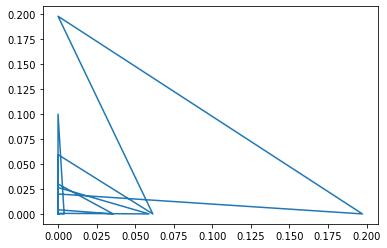

In [107]:
#plt.plot(df["timestamp"],df["amountUSD"])
#df['amount0In'] = pd.to_numeric(df['amount0In'])
df['amount0Out'] = pd.to_numeric(df['amount0Out'])
df['amount1In'] = pd.to_numeric(df['amount1In'])
df['amount1Out'] = pd.to_numeric(df['amount1Out'])
df['amount0In'] = pd.to_numeric(df['amount0In'])
df['amountUSD'] = pd.to_numeric(df['amountUSD'])
print(type(df['amountUSD'][1]))

df['RollingUSD'] = df['amountUSD'].rolling(window = 3).mean()
#print(df)
plt.plot(df['amount1Out'],df['amount1In'])
df['RollingUSD3'] = df['amountUSD'].rolling(window = 20).mean()
df['RollingUSD4'] = df['amountUSD'].rolling(window = 30).mean()
#print(df)
plt.plot(df['RollingUSD'])
plt.plot(df['RollingUSD3'])
plt.plot(df['RollingUSD4'])


#df['cum_sum'] = cummulative_list['Liquidity'].cumsum()
#df['check'] = range(1,len(cummulative_list['Liquidity'])+1)
#df['Liquidity'] = pd.to_numeric(cummulative_list['Liquidity'])
#df['Moving Average'] = cummulative_list['cum_sum'] / cummulative_list['check']
#df['Rolling Mean'] = cummulative_list['Liquidity'].rolling(window = 3).mean()

#the format is always x,y. Need more variables here